<a href="https://colab.research.google.com/github/jeffreygalle/MAT421/blob/main/Modeling_Heart_Disease_Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling Heart Disease Risk Assessment


The project aims to leverage numerical methods to assess heart disease risk and early detection of heart disease. Using the UCI Heart Disease dataset, the model is focused on identifying individuals at high risk for heart disease with hopes to facilitate earlier intervention.

## About the Dataset

The UCI Heart Disease Dataset is a multivariable set containing information from patients who have undergone heart disease related diagnostic testing. The set includes the following attributes:

1. **ID:** A unique identifier for each patient.
2. **Age**: The patient's age in years, which is a primary risk factor for heart disease.
3. **Origin:** The place of the study, indicating the geographical context of the data.
4. **Sex:** The patient's sex (Male/Female), as heart disease risk can vary between
genders.
5. **CP:** (Chest Pain Type): Categorizes chest pain into types such as typical angina,
atypical angina, non-anginal, or asymptomatic, providing insights into potential
heart disease.
6. **Trestbps:** (Resting Blood Pressure): High blood pressure is a significant risk
factor for heart disease.
7. **Chol:** (Serum Cholesterol): Elevated cholesterol levels are associated with
increased heart disease risk.
8. **FBS:** (Fasting Blood Sugar): Indicates if fasting blood sugar is greater than 120
mg/dl, a condition that can increase heart disease risk.
9. **Restecg:** (Resting Electrocardiographic Results): Reveals abnormalities in heart
rhythm that might indicate heart disease.
10. **Thalach:** (Maximum Heart Rate Achieved): Lower maximum heart rate can
signal increased heart disease risk.
11. **Exang:** (Exercise-Induced Angina): Angina induced by exercise can indicate
underlying heart disease.
12. **Oldpeak:** (ST Depression Induced by Exercise): Elevation or depression in the
ST segment can indicate myocardial ischemia.
13. **Slope:** (Slope of the Peak Exercise ST Segment): The slope of the ST segment
during peak exercise provides information on heart function.
14. **Ca:** (Number of Major Vessels): Visible through fluoroscopy, the number of
vessels affected can indicate the severity of heart disease.
15. **Thal:** (Thalassemia): A blood disorder that can affect heart function.
16. **Num:** (Predicted Attribute): The diagnosis of heart disease.

In [6]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('heart_disease_uci.csv')
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Missing (null) values in the dataset.

We must indentify missing values in the columns because it directly influences the accuracy and explanatory power of research and clinical decisions.

In [7]:
# Check for missing values in each column
missing_data = df.isnull().sum()

# Filter out columns where no data is missing
missing_data = missing_data[missing_data > 0]

print(missing_data)

# Percentage of missing values for columns with missing data only
missing_percentage = (missing_data / len(df)) * 100

print(missing_percentage)


trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
dtype: float64


# Summary Statistics

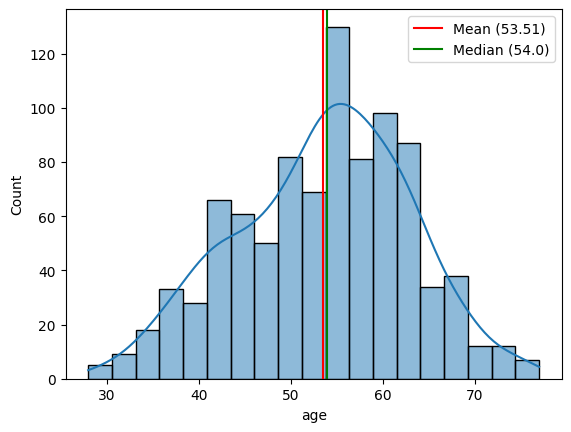

Age Summary Statistics:
Minimum age: 28
Maximum age: 77
Mean: 53.51086956521739
Mode: 54
Median (50th Percentile): 54.0
Standard Deviation: 9.424685209576857
25th Percentile: 47.0
75th Percentile: 60.0

Sex Proportion Statistics:
Male count: 726
Female count: 194
Male percentage: 78.91304347826087
Female percentage: 21.086956521739133
Male count is 274.23% more than female count.

Cardiovascular Biomarkers Statistics:
Minimum Resting Blood Pressure: 0.0
Maximum Resting Blood Pressure: 200.0
Mean: 132.13240418118468
Mode: 120.0
Median (50th Percentile): 130.0
Standard Deviation: 19.066069518587476
25th Percentile: 120.0
75th Percentile: 140.0


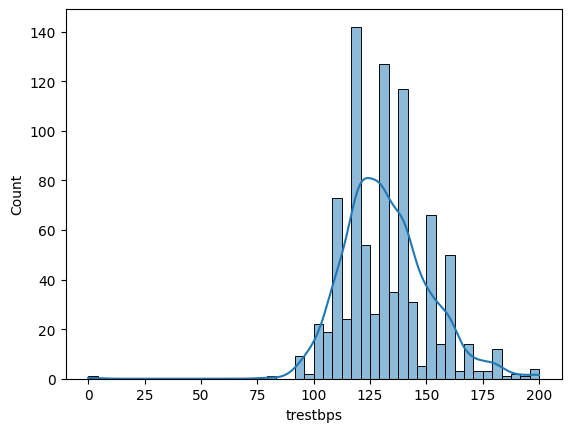

In [8]:
# Age distribution

percentiles = df['age'].quantile([0.25, 0.5, 0.75])

df['age'].min(),df['age'].max()
sns.histplot(df['age'],kde=True)


# Add vertical lines for mean and median
plt.axvline(df['age'].mean(), color='red', label='Mean ({:.2f})'.format(df['age'].mean()))
plt.axvline(df['age'].median(), color='green', label='Median ({})'.format(df['age'].median()))
# Show legend
plt.legend()
# Show plot
plt.show()

print("Age Summary Statistics:")
print("Minimum age:", df['age'].min())
print("Maximum age:", df['age'].max())
print("Mean:", df['age'].mean())
print('Mode:', df['age'].mode()[0])
print('Median (50th Percentile):', percentiles[0.5])
print('Standard Deviation:', df['age'].std())
print("25th Percentile:", percentiles[0.25])
print("75th Percentile:", percentiles[0.75])


# Female and male statistics
print("\nSex Proportion Statistics:")

male_count = df['sex'].value_counts().get('Male', 0)
female_count = df['sex'].value_counts().get('Female', 0)

# Calculate total count
total_count = male_count + female_count

# Calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# Calculate percentage difference between male and female counts
male_more_than_female = ((male_count - female_count) / female_count) * 100


print("Male count:", male_count)
print("Female count:", female_count)
print("Male percentage:", male_percentage)
print("Female percentage:", female_percentage)
print("Male count is {:.2f}% more than female count.".format(male_more_than_female))
df.groupby('sex')['dataset'].value_counts()



# Cardiovascular biomarkers
print("\nCardiovascular Biomarkers Statistics:")

# Exploring the trestbps resting blood pressure resting blood pressure in mm Hg on admission to the hospital
trestbps_percentiles = df['trestbps'].quantile([0.25, 0.5, 0.75])

print("Minimum Resting Blood Pressure:", df['trestbps'].min())
print("Maximum Resting Blood Pressure:", df['trestbps'].max())

print("Mean:", df['trestbps'].mean())
print('Mode:', df['trestbps'].mode()[0])
print('Median (50th Percentile):', trestbps_percentiles[0.5])
print('Standard Deviation:', df['trestbps'].std())
print("25th Percentile:", trestbps_percentiles[0.25])
print("75th Percentile:", trestbps_percentiles[0.75])


sns.histplot(data=df, x="trestbps", kde=True)
plt.show()


In [10]:
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

# Statistical Summary:


* Age: The patients range from 28 to 77 years old, with a mean age of 53.5 years.
* Blood Pressure (trestbps): Values range from 0 (likely erroneous) to 200 mm Hg.

* Cholesterol (chol): Values range from 0 (likely errors) to 603 mg/dl.
* Maximum Heart Rate (thalch): Ranges from 60 to 202 beats per minute.
* ST Depression (oldpeak): Values range from -2.6 to 6.2, with negative values possibly indicating measurement or data entry errors.
* Number of Major Vessels (ca): This field had a lot of missing values, with non-null data ranging from 0 to 3.



## Imputation

Statistical procedure used to estimate missing values in datasets with substituted values to allow for complete analysis.

## We must verify zero and negative Values:


The zero values for trestbps and chol need verification as they are not plausible

In [16]:
# Identify entries with zero or negative values for trestbps, chol, oldpeak
zero_trestbps = df[df['trestbps'] <= 0]
zero_chol = df[df['chol'] <= 0]
negative_oldpeak = df[df['oldpeak'] < 0]

# Count
zero_trestbps_count = zero_trestbps.shape[0]
zero_chol_count = zero_chol.shape[0]
negative_oldpeak_count = negative_oldpeak.shape[0]

zero_trestbps_count, zero_chol_count, negative_oldpeak_count, zero_trestbps.head(), zero_chol.head(), negative_oldpeak.head()



# Calculate mean and standard deviations
mean_trestbps = df[df['trestbps'] > 0]['trestbps'].mean()
std_trestbps = df[df['trestbps'] > 0]['trestbps'].std()
imputed_trestbps = mean_trestbps + std_trestbps

mean_chol = df[df['chol'] > 0]['chol'].mean()
std_chol = df[df['chol'] > 0]['chol'].std()
imputed_chol = mean_chol + std_chol

mean_oldpeak = df[df['oldpeak'] > 0]['oldpeak'].mean()
std_oldpeak = df[df['oldpeak'] > 0]['oldpeak'].std()
imputed_oldpeak = mean_oldpeak + std_oldpeak

# Impute incorrect values
df.loc[df['trestbps'] <= 0, 'trestbps'] = imputed_trestbps
df.loc[df['chol'] <= 0, 'chol'] = imputed_chol
df.loc[df['oldpeak'] < 0, 'oldpeak'] = imputed_oldpeak



# Spearman's Rank Correlation


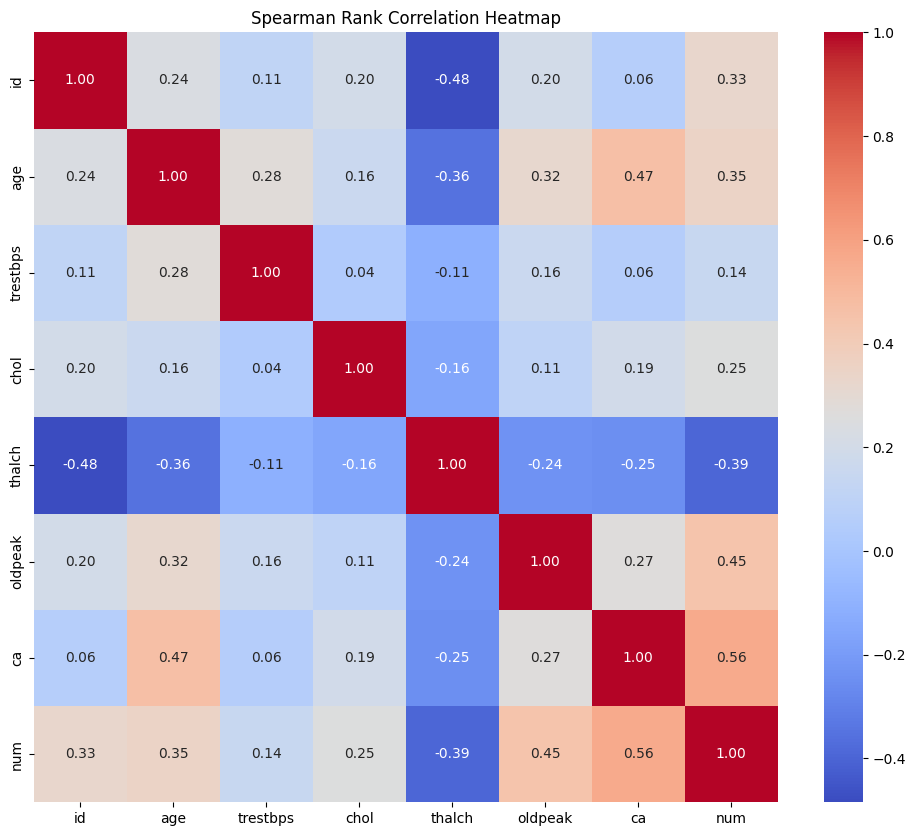

In [23]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute the Spearman's rank correlation matrix for numeric columns
spearman_corr = numeric_cols.corr(method='spearman')

# Generate a heatmap of the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

High absolute values (close to 1 or -1) indicate strong relationships.



1. Age and Thalach (Maximum Heart Rate): This pair's value is -.36, indicating that maximum heart rate achievable during exercise might decrease with age.

2. Age and Ca (Number of Major Vessels Seen by Fluoroscopy): This pair's value is 0.47, indicating older age may be associated with a greater likelihood of having more visible blockages in vessels.



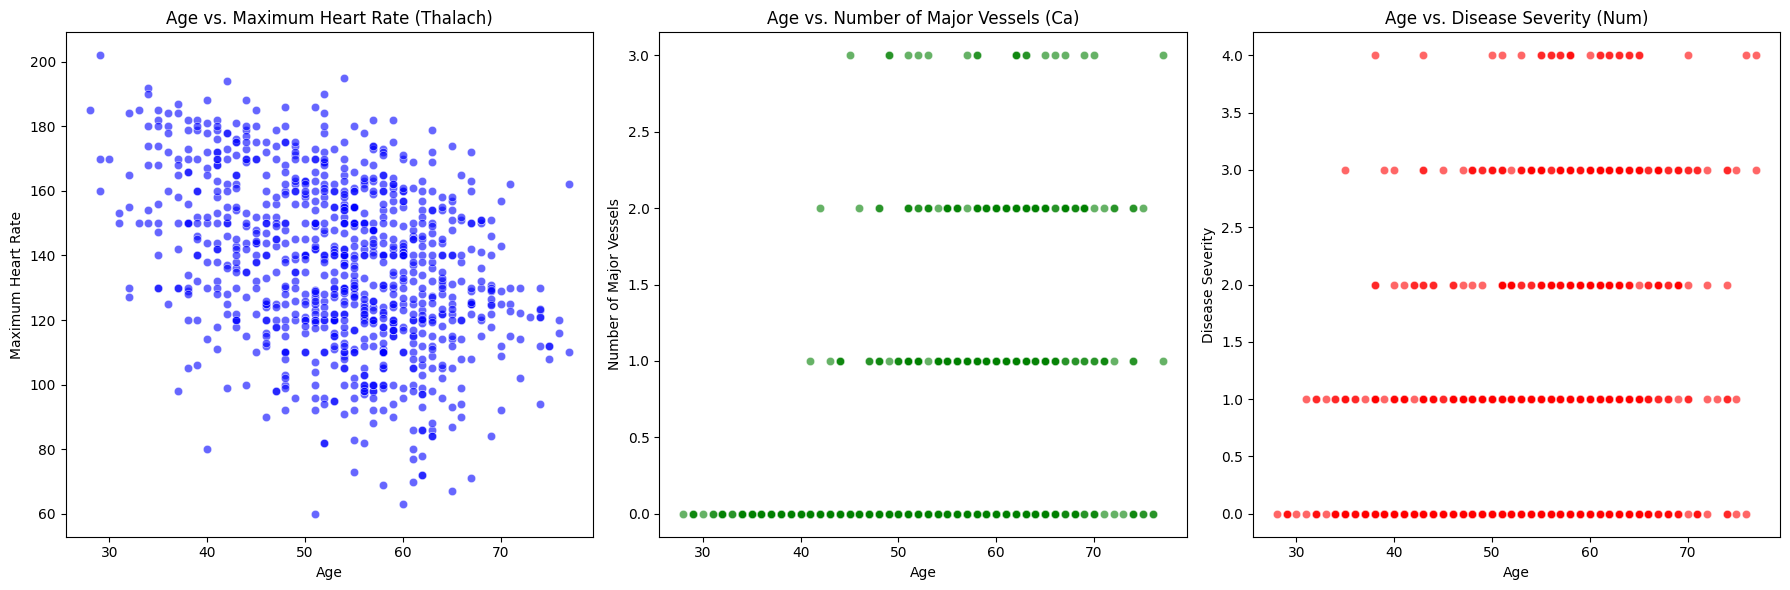

In [24]:
# Ensure there are no NaN values specifically in 'thalch', 'ca', and 'num' before plotting
plot_data_clean = df.dropna(subset=['thalch', 'ca', 'num'])

# Plotting the clean data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Age vs. Thalach
sns.scatterplot(ax=axes[0], data=plot_data_clean, x='age', y='thalch', color='blue', alpha=0.6)
axes[0].set_title('Age vs. Maximum Heart Rate (Thalach)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Maximum Heart Rate')

# Scatter plot for Age vs. Ca
sns.scatterplot(ax=axes[1], data=plot_data_clean, x='age', y='ca', color='green', alpha=0.6)
axes[1].set_title('Age vs. Number of Major Vessels (Ca)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of Major Vessels')

# Scatter plot for Age vs. Num
sns.scatterplot(ax=axes[2], data=plot_data_clean, x='age', y='num', color='red', alpha=0.6)
axes[2].set_title('Age vs. Disease Severity (Num)')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Disease Severity')

plt.tight_layout()
plt.show()




1.   Age vs. Maximum Heart Rate (Thalach):
This scatter plot shows a general trend where maximum heart rate decreases as age increases. This is expected as older persons typically have lower maximum heart rate.
2.   Age vs. Number of Major Vessels (Ca):
It shows that older individuals have more major vessels visible by fluoroscopy, which could indicate more prevalent vascular disease as age increases.
3.  Age vs. Disease Severity (Num):
This plot suggests a trend where older individuals have higher disease severity, correlating with the common understanding that heart disease risks increase with age.



Male and Female Comparison



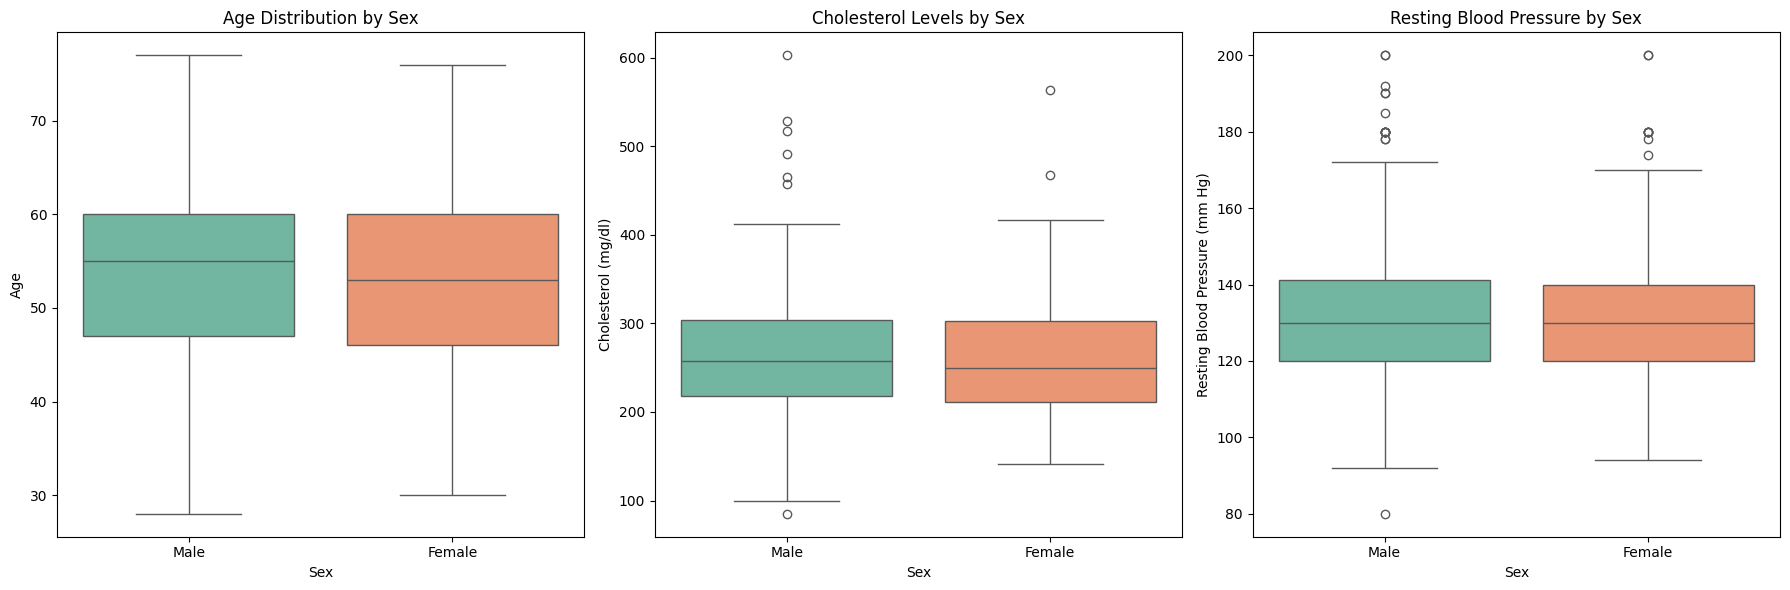

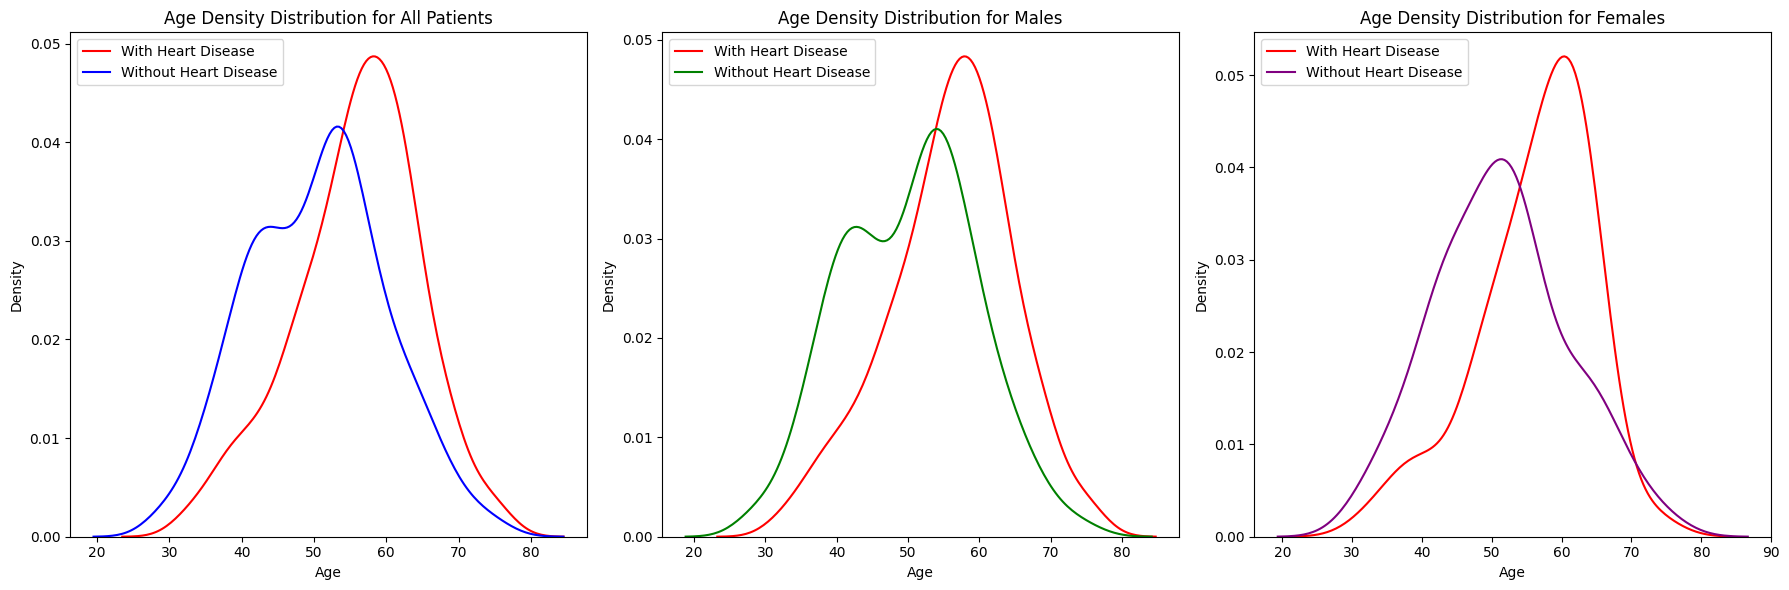

In [28]:
# Setting up the plots for visual comparisons
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for Age
sns.boxplot(ax=axes[0], data=df, x='sex', y='age', palette='Set2')
axes[0].set_title('Age Distribution by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Age')

# Box plot for Cholesterol
sns.boxplot(ax=axes[1], data=df, x='sex', y='chol', palette='Set2')
axes[1].set_title('Cholesterol Levels by Sex')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Cholesterol (mg/dl)')

# Box plot for Resting Blood Pressure
sns.boxplot(ax=axes[2], data=df, x='sex', y='trestbps', palette='Set2')
axes[2].set_title('Resting Blood Pressure by Sex')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Resting Blood Pressure (mm Hg)')

plt.tight_layout()
plt.show()



# Setting up the plots for density distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Density plot for the overall dataset
sns.kdeplot(data=df[df['num'] > 0]['age'], ax=axes[0], label='With Heart Disease', color='red')
sns.kdeplot(data=df[df['num'] == 0]['age'], ax=axes[0], label='Without Heart Disease', color='blue')
axes[0].set_title('Age Density Distribution for All Patients')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')
axes[0].legend()

data_male = df[df['sex'] == 'Male']

# Density plot for males
sns.kdeplot(data=data_male[data_male['num'] > 0]['age'], ax=axes[1], label='With Heart Disease', color='red')
sns.kdeplot(data=data_male[data_male['num'] == 0]['age'], ax=axes[1], label='Without Heart Disease', color='green')
axes[1].set_title('Age Density Distribution for Males')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].legend()

data_female = df[df['sex'] == 'Female']

# Density plot for females
sns.kdeplot(data=data_female[data_female['num'] > 0]['age'], ax=axes[2], label='With Heart Disease', color='red')
sns.kdeplot(data=data_female[data_female['num'] == 0]['age'], ax=axes[2], label='Without Heart Disease', color='purple')
axes[2].set_title('Age Density Distribution for Females')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Density')
axes[2].legend()

plt.tight_layout()
plt.show()

# Plot Interpretations

1. Age:
Both males and females show a wide range of ages, males have a slightly higher median.
Their interquartile ranges are similar, indicating similar variability in age among the groups.
2. Cholesterol (mg/dl):
Median cholesterol levels are nearly identical between males and females.
Females show a slightly wider interquartile range, indicating more variability in cholesterol levels among females.
3. Resting Blood Pressure (mm Hg):
Median values for resting blood pressure are quite similar across male and females.
Males have a slightly tighter interquartile range, suggesting less variability in blood pressure compared to females.

## Density Plot Interpreations


1.   Patients with heart disease tend to have a higher density around the age of 55 to 65
2.   Patients *without* heart disease have a more evenly distributed age density, it peaks slightly in the younger age groups




# Takeaways

A large portion of this dataset required missing and erronous values to be corrected (imputated).


 Once those values were corrected, here is a summary of what was found:

-- Descriptive Statistics:
*   Age: The mean age of the participants was around 53 years, with male participants slightly older on average than female participants.
*   Cholesterol Levels: Both male and female individuals had similar average cholesterol levels, around 257 mg/dl, suggesting that high cholesterol is a common issue across the board.
* Resting Blood Pressure: The average resting blood pressure was similar between males and females, around 132 mm Hg, which is slightly elevated above the normal range.

-- Correlation:
* There are several notable correlations, age and maximum heart rate (negative) and age and the number of major vessels seen (positive). These correlations are consistent with medical knowledge that heart disease risks increase with age and that older individuals are more likely to have visible signs of coronary artery disease.

